In [ ]:
# "ML Pjoject"
> "데이터 선정 및 EDA"

- toc:true- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

### 데이터 선정
* COVID-19의 영향으로 가계대출이 급증하였다. 에에 가계부채가 사상 최대치르 찍으며 주요 은행들로부터 대출 규졔가 시작되었습니다.
* 이에 대해 은행 입장에서 채무(Target)를 갚으 것인지에 대한 예측을 해보고자 합니다.
* 데이터는 Kaggle의 'Home Credit Default Risk'로 부터 가져왔습니다.

In [ ]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [ ]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [ ]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Feature 설명(너무 많은 Feature로 일부만 소개하도록 하겠습니다.)
* SK_ID_CURR : 현재 대출 고유 ID
* TARGET : 타겟값(채무 이행/불이행)
* AMT_INCOME_TOTAL : 소득
* AMT_CREDIT : 대출금액
* AMT_ANNUITY : 월 대출 지급액
* AMT_GOODS_PRICE : 소비자 대출 상품액
* EXT_SOURCE_1 ~ EXT_SOURCE_3 : 정규화된 스코어
* APARTMENTS_AVG ~ EMERGENCYSTATE_MODE : 고객 거주지역의 특정값(정규화된 값)
* OBS_30_CNT_SOCIAL_CIRCLE : 30일 연체된 횟수
* DEF_30_CNT_SOCIAL_CIRCLE : 30일 연체로  Default 된 횟수
* OBS_60_CNT_SOCIAL_CIRCLE : 60일 연체된 횟수
* DEF_60_CNT_SOCIAL_CIRCLE : 60일 연체로  Default 된 횟수
* DAYS_LAST_PHONE_CHANGE : 대출 신청전 핸드폰 변경 횟수
* FLAG_DOCUMENT_2 ~ FLAG_DOCUMENT_21 : 문서 제출 여부
* AMT_INSTALMENT : 대출 월 납입예정액
* AMT_PAYMENT : 실제 월 납입액

In [ ]:
app_train.shape, app_test.shape
# 매우 많은 feature과 Data..

((307511, 122), (48744, 121))

#### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
* TARGET값 별 분포도, Pandas, Matplotlib, Seaborn으로 histogram 표현

In [ ]:
app_train['TARGET'].value_counts()
# 치우쳐진(Skew) Data이다.

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:>

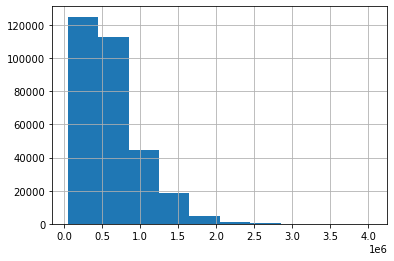

In [ ]:
app_train['AMT_CREDIT'].hist()

C:\Users\channee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

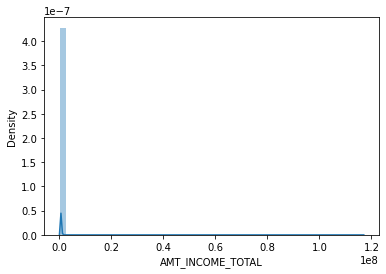

In [ ]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

C:\Users\channee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

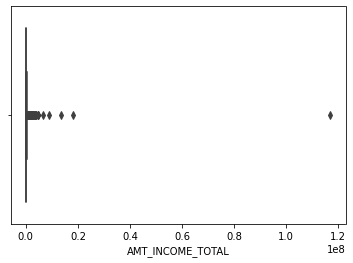

In [ ]:
sns.boxplot(app_train['AMT_INCOME_TOTAL'])


### AMT_INCOME_TOTAL은 매우 우측으로 치우쳐진(Skew) 데이터이다.
### AMT_INCOME_TOTAL이 1000000 이하인 값에 대한 분포도를 살펴보자.
* boolean indexing으로 filtering 후 histogram 표현

In [ ]:
app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

<AxesSubplot:>

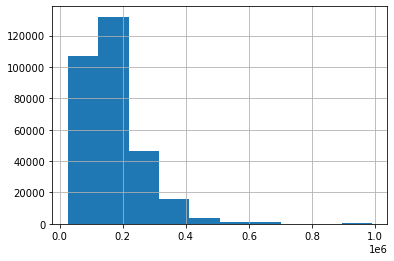

In [ ]:
# boolean indexing 으로 filtering 적용 
app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'].hist()

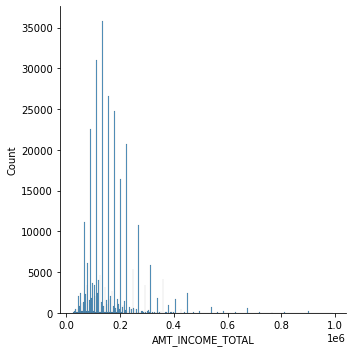

In [ ]:
sns.displot(app_train[app_train['AMT_INCOME_TOTAL'] < 1000000]['AMT_INCOME_TOTAL'])

C:\Users\channee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

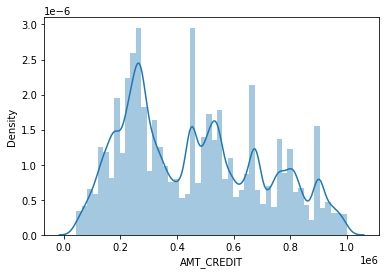

In [ ]:
# distplot으로 his(togram 표현 
sns.distplot(app_train[app_train['AMT_CREDIT'] < 1000000]['AMT_CREDIT']))

#### TARGET 값에 따른 AMT_INCOME_TOTAL값 분포도 비교
* distplot과 violinplot 시각화
* plt.subplots() 기반으로 seaborn의 distplot과 violinplot으로 분포도 비교 시각화

C:\Users\channee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\channee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

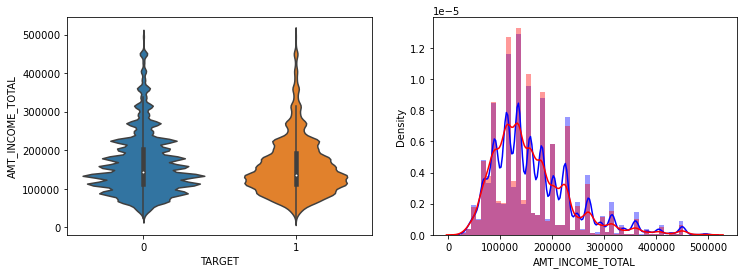

In [ ]:
# TARGET 값 유형에 따른 Boolean Indexing 조건
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)
# 2개의 subplot을 생성하고  왼쪽에는 violinplot을 오른쪽에는 distplot을 표현
fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
# violin plot을 왼쪽 subplot에 그림. 
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=axs[0][0] )
# Histogram을 오른쪽 subplot에 그림. 
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label='0', color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label='1', color='red')

* AMT_INCOME_TOTAL이 100000~150000사이의 값에서 대부분 data가 모여있는것을 알 수 있다.
* 시각화를 하는 코드를 함수로 구현해보았다

C:\Users\channee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\channee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


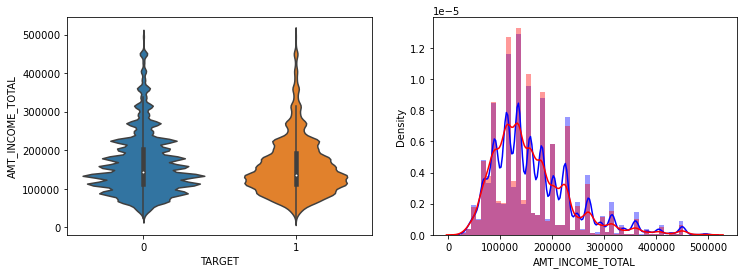

In [ ]:
def show_column_hist_by_target(df, column, is_amt=False):    
    cond1 = (df['TARGET'] == 1)
    cond0 = (df['TARGET'] == 0)

    fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    # is_amt가 True이면 < 500000 조건으로 filtering
    cond_amt = True
    if is_amt:
        cond_amt = df[column] < 500000
    
    sns.violinplot(x='TARGET', y=column, data=df[cond_amt], ax=axs[0][0] )
    sns.distplot(df[cond0 & cond_amt][column], ax=axs[0][1], label='0', color='blue')
    sns.distplot(df[cond1 & cond_amt][column], ax=axs[0][1], label='1', color='red')

show_column_hist_by_target(app_train, 'AMT_INCOME_TOTAL', is_amt=True)

### Preprocessing
#### app_train과 app_test를 합쳐서 한번에 데이터 preprocessing 수행.

In [ ]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [ ]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

In [ ]:
# app_train의 TARGET 값을 Null로 입력됨. 
apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

#### Object feature들을 Label Encoding
* pandas의 factorize()를 이용

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [ ]:
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

In [ ]:
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
apps['CODE_GENDER']

0        M
1        F
2        M
3        F
4        M
        ..
48739    F
48740    F
48741    F
48742    M
48743    F
Name: CODE_GENDER, Length: 356255, dtype: object

In [ ]:
# pd.factorize()는 편리하게 Category 컬럼을 Label인코딩 수행. 
# pd.factorize(Category컬럼 Series)는 Label인코딩된 Series와 uniq한 Category값을 반환함. 
# [0]을 이용하여 Label인코딩 Series만 취함. 
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]
apps['CODE_GENDER']

0        0
1        1
2        0
3        1
4        0
        ..
48739    1
48740    1
48741    1
48742    0
48743    1
Name: CODE_GENDER, Length: 356255, dtype: int64

In [ ]:
# object column을 한번에 Label 인코딩하자
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


#### 결측치 처리

In [ ]:
apps.isnull().sum().head(100)

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
# -999로 모든 컬럼들의 Null값 변환
# 
apps = apps.fillna(-999)

#### 학습 데이터와 테스트 데이터 다시 분리

In [ ]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET']== -999]
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [ ]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('TARGET', axis=1)

In [ ]:
app_test.shape

(48744, 121)

In [ ]:
app_test.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 
* 피처용 데이터와 타겟 데이터 분리
* 학습용/검증용 데이터 세트 분리

In [ ]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2021)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc', verbose= 100, early_stopping_rounds= 50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.753149	training's binary_logloss: 0.249708	valid_1's auc: 0.740531	valid_1's binary_logloss: 0.253105
[200]	training's auc: 0.7723	training's binary_logloss: 0.242948	valid_1's auc: 0.751634	valid_1's binary_logloss: 0.24893
[300]	training's auc: 0.784721	training's binary_logloss: 0.238878	valid_1's auc: 0.755786	valid_1's binary_logloss: 0.247481
[400]	training's auc: 0.796331	training's binary_logloss: 0.235508	valid_1's auc: 0.756972	valid_1's binary_logloss: 0.247029
[500]	training's auc: 0.806504	training's binary_logloss: 0.232526	valid_1's auc: 0.757287	valid_1's binary_logloss: 0.246869
[600]	training's auc: 0.815748	training's binary_logloss: 0.229736	valid_1's auc: 0.757548	valid_1's binary_logloss: 0.246756
Early stopping, best iteration is:
[612]	training's auc: 0.816579	training's binary_logloss: 0.229435	valid_1's auc: 0.757631	valid_1's binary_logloss: 0.246736


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

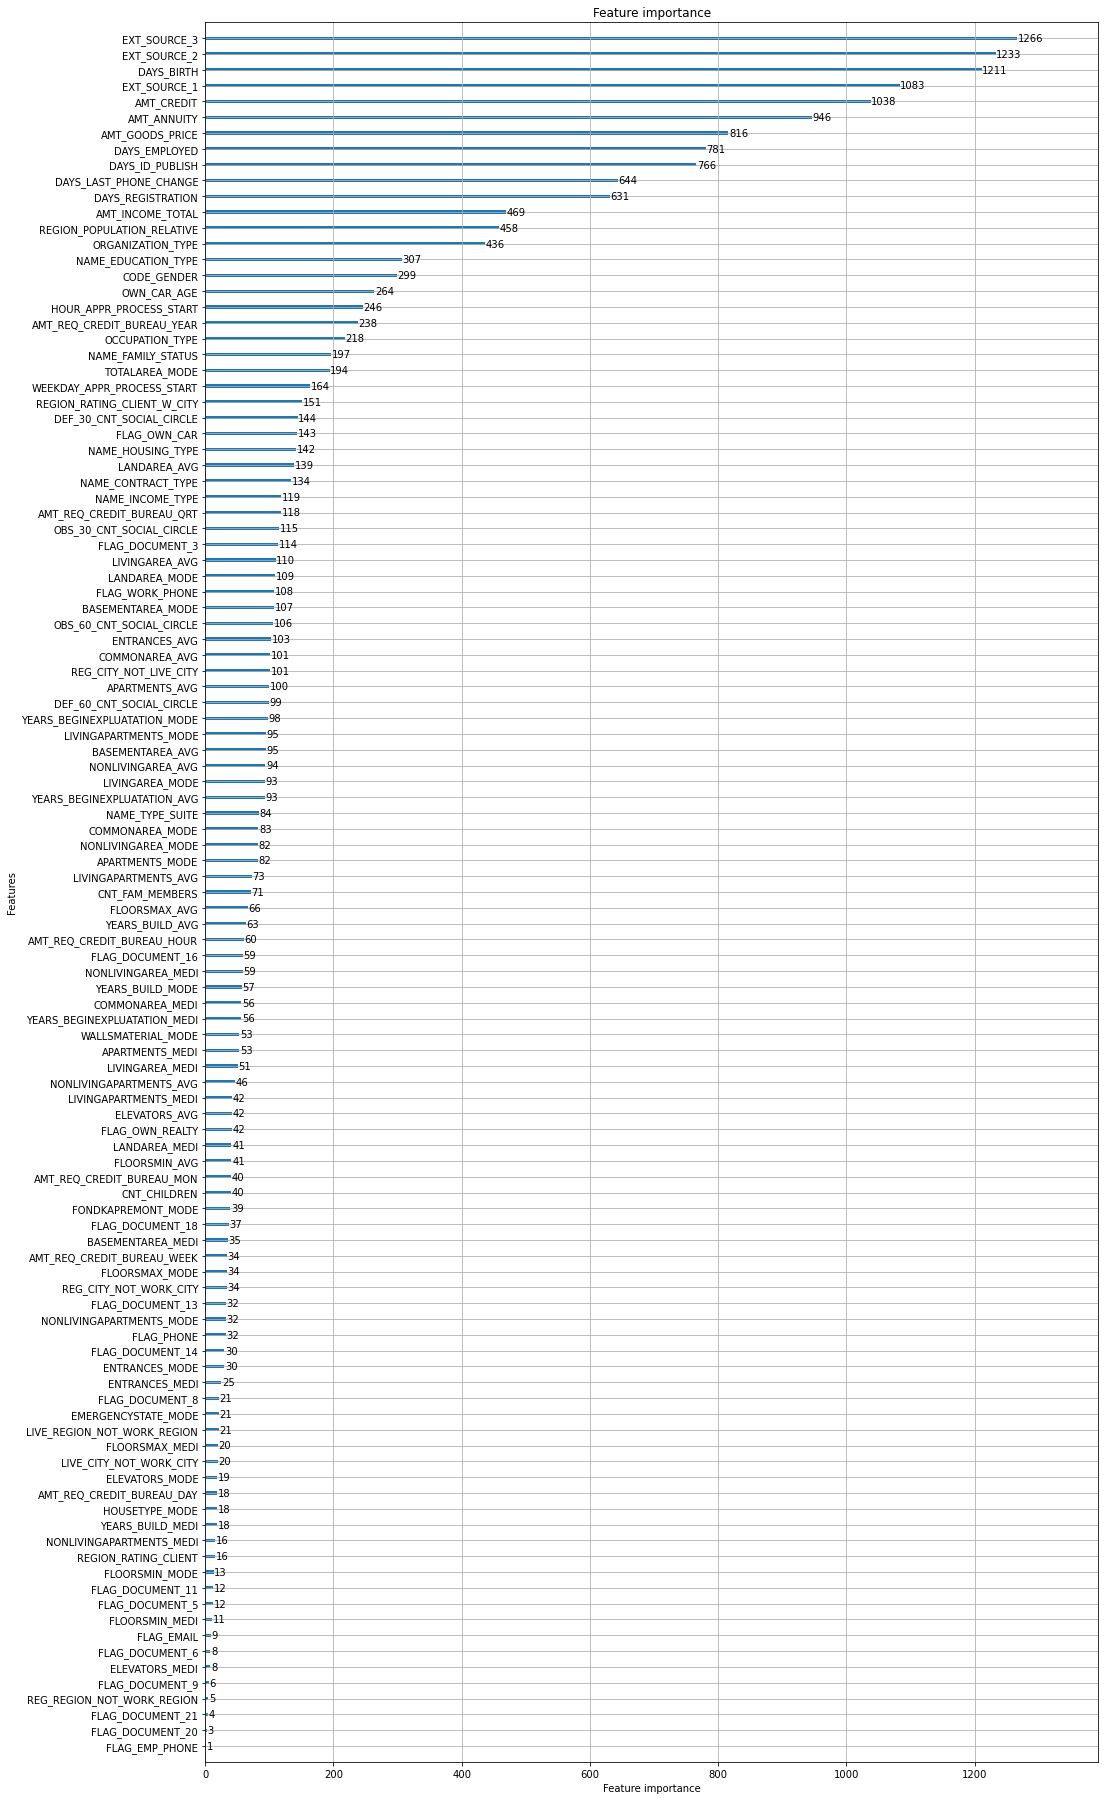

In [ ]:
# Feature Importance 시각화
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

### 임시결론
* 데이터 Preprocessing 없이 가볍게 Lightgbm을 수행시키고 주요 Feature들을 확인하였습니다.
* 이를 baseline으로 해서 EDA부터 다시 시행해보고자 한다.

In [ ]:
# 주요 라이브러리 부터 다시 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc,os,sys
import random

from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [ ]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

#### 연속형 숫자 feature들에 대해서 TARGET값이 각각 0과 1일때의 Histogram 시각화
* violinplot과 distplot으로 숫자형 feature들에 대해 TARGET값 별 분포도 비교 시각화
* 주요 Feature(numeric)에 대해서만 시각화

In [ ]:
def show_hist_by_target(df, column):
    cond_1 = (df['TARGET'] ==1)
    cond_0 = (df['TARGET'] ==0)

    for column in columns:
        print('column names:', column)
        fig,axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2, squeeze=False)
        sns.violinplot(x='TARGET', y=column, data=df, ax=axs[0][0])
        sns.distplot(df[cond_1][column], label='1', color='red', ax=axs[0][1])
        sns.distplot(df[cond_0][column], label='1', color='blue', ax=axs[0][1])



column names: AMT_INCOME_TOTAL
column names: AMT_CREDIT
column names: AMT_ANNUITY
column names: AMT_GOODS_PRICE
column names: DAYS_BIRTH
column names: DAYS_EMPLOYED
column names: DAYS_ID_PUBLISH
column names: DAYS_REGISTRATION
column names: DAYS_LAST_PHONE_CHANGE
column names: CNT_FAM_MEMBERS
column names: REGION_RATING_CLIENT
column names: EXT_SOURCE_1
column names: EXT_SOURCE_2
column names: EXT_SOURCE_3
column names: AMT_REQ_CREDIT_BUREAU_HOUR
column names: AMT_REQ_CREDIT_BUREAU_DAY
column names: AMT_REQ_CREDIT_BUREAU_WEEK
column names: AMT_REQ_CREDIT_BUREAU_MON
column names: AMT_REQ_CREDIT_BUREAU_QRT
column names: AMT_REQ_CREDIT_BUREAU_YEAR


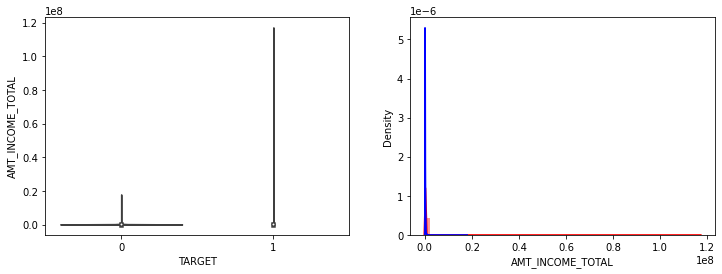

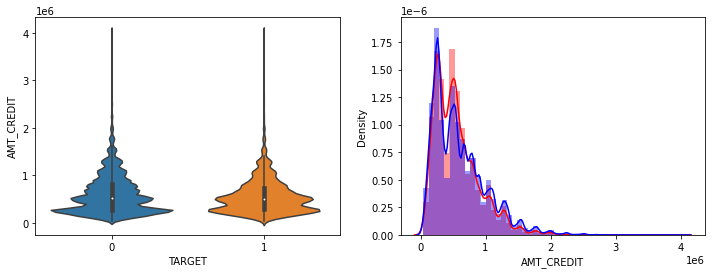

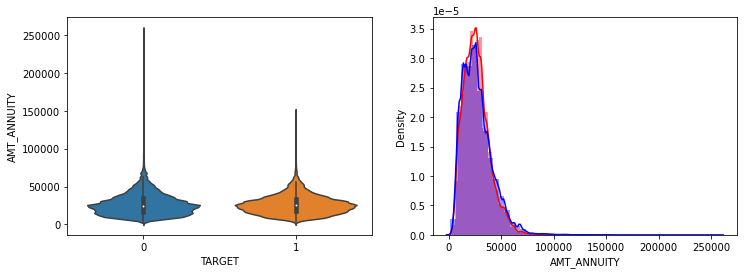

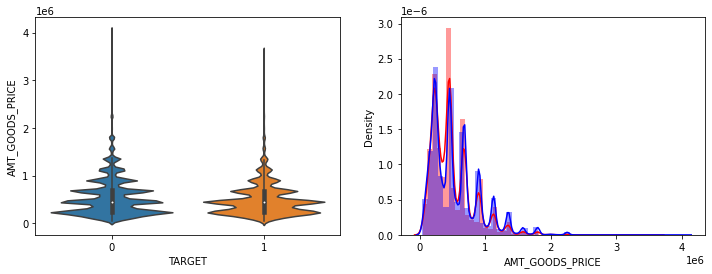

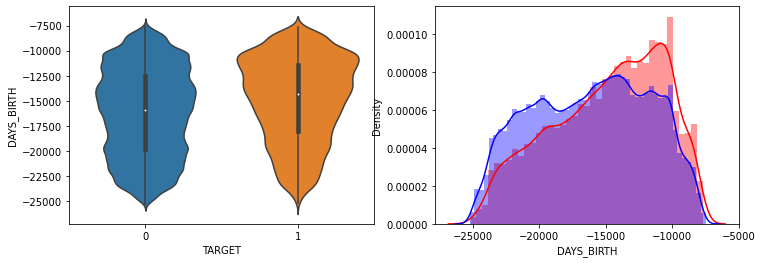

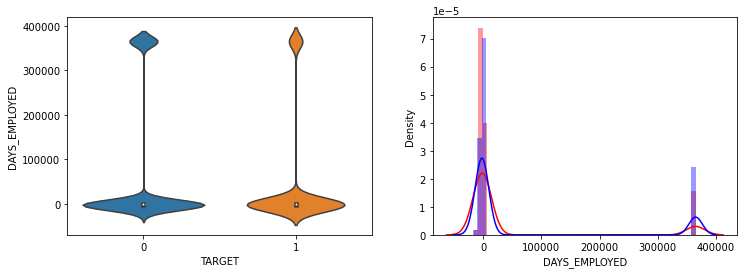

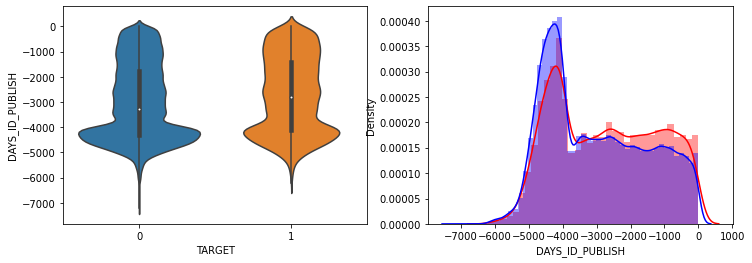

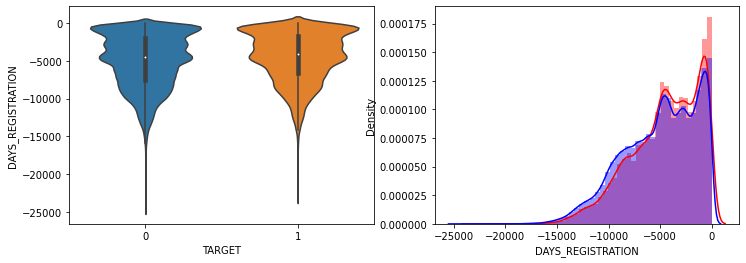

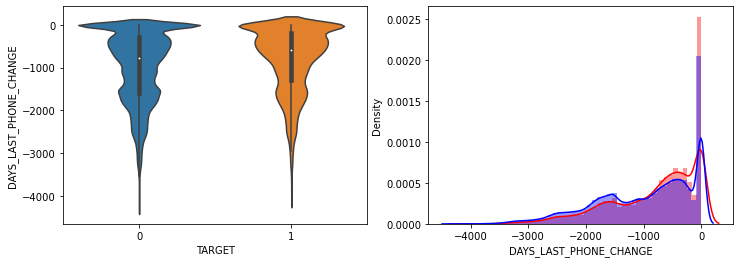

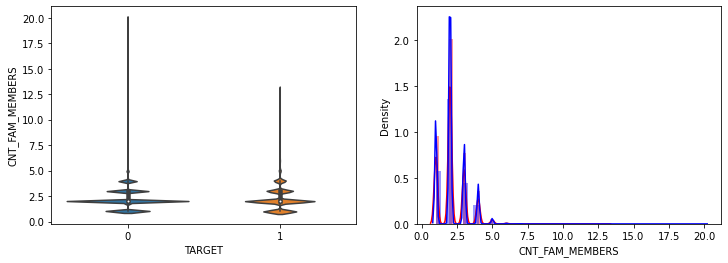

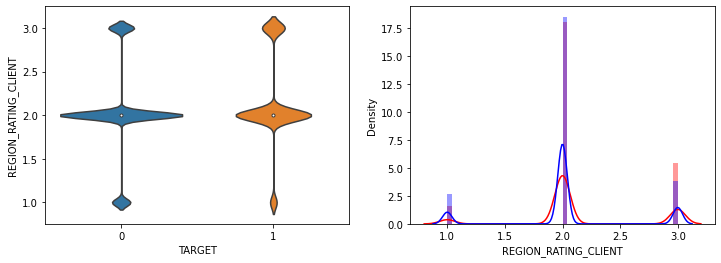

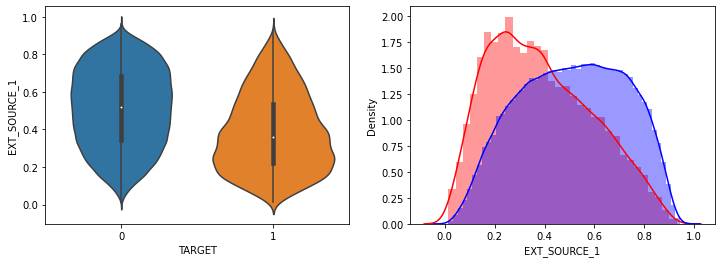

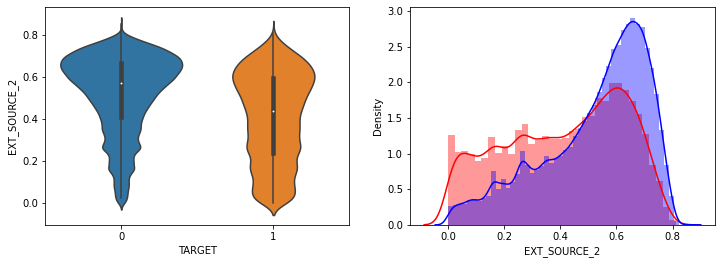

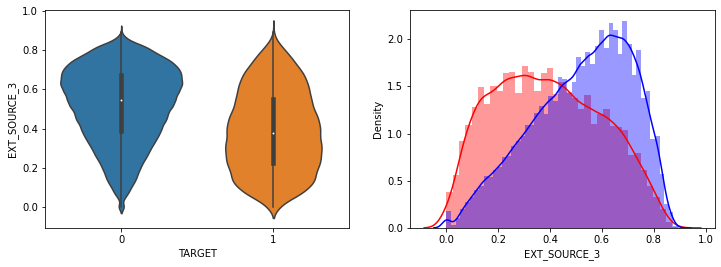

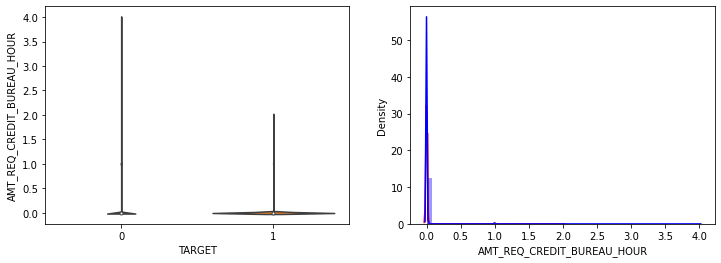

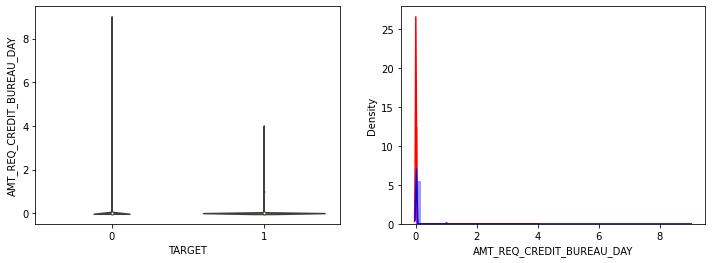

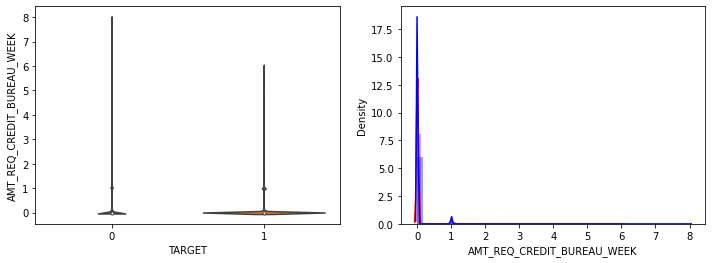

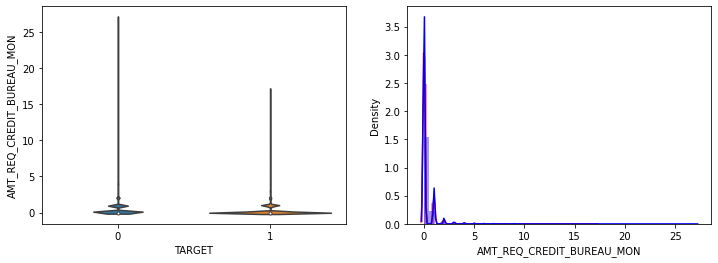

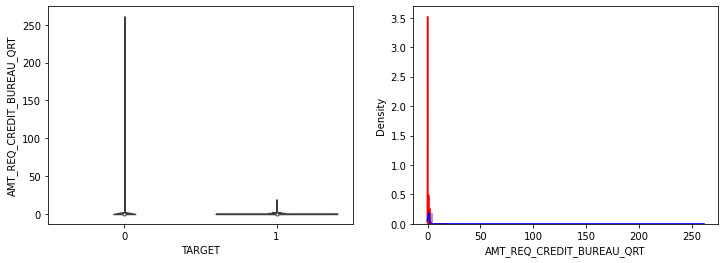

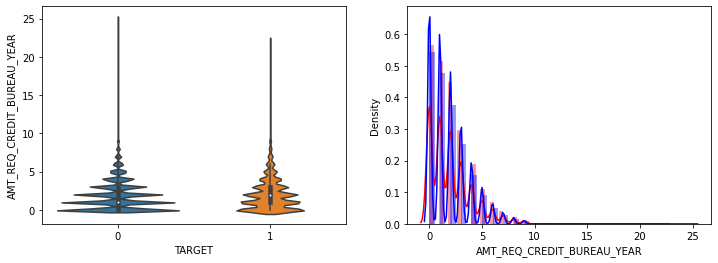

In [ ]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

show_hist_by_target(app_train, columns)

* AMT_INCOME_TOTAL, AMT_CREDIT 은 크게 차이가 없음. 
* AMT_ANNUITY는 TARGET=1시 상대적으로 작은 숫자대의 값이 조금 많음. 
* AMT_GOOD_PRICE는 크게 차이가 없음. 
* DAYS_BIRTH는 TARGET=1시 적은 연령대의 숫자값이 상대적으로 많음. 
* DAYS_EMPLOYED는 TARGET=1시 작은 값들이 조금 더 많음. 
* DAYS_ID_PUBLISH, DAYS_REGISTRATION  는 TARGET=1시 최근 값들이 조금 더 많음. 
* DAYS_LAST_PHONE_CHANGE는 큰 차이 없음. 
* CNT_FAM_MEMBERS는 차이가 없음. outlier 때문에 histogram에 차이가 있어 보임. 
* REGION_RATING_CLIENT는 큰 차이 없음 
* EXT_SOURCE_1,EXT_SOURCE_2, EXT_SOURCE_3 모두 조금씩 차이가 있음.  
* 나머지 컬럼모두 큰 차이가 없음. 
* 전반적으로 연령대가 낮은(직장 경력이 적은), 소액 대출에서 상대적으로 연체 비중이 높음.  

#### seaborn의 countplot() 또는 catplot()을 이용하여 category 피처(object 컬럼)을 TARGET 유형에 따라 Count 비교

In [ ]:
object_columns = app_train.dtypes[app_train.dtypes=='object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

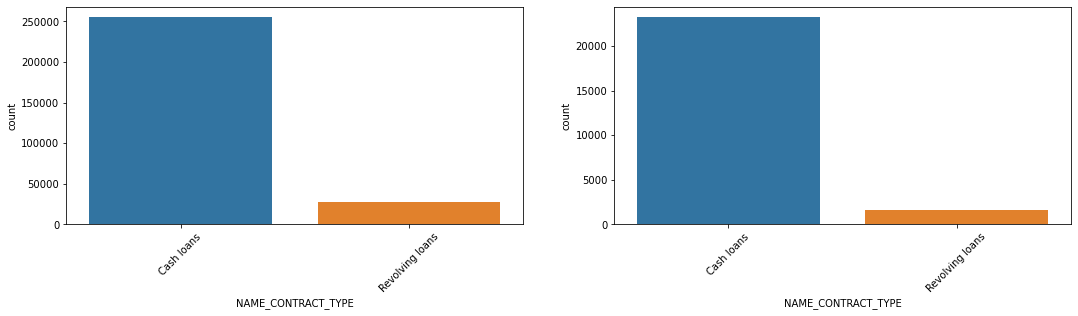

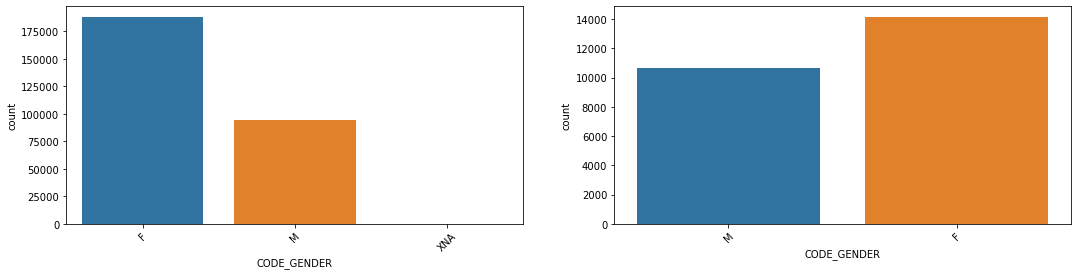

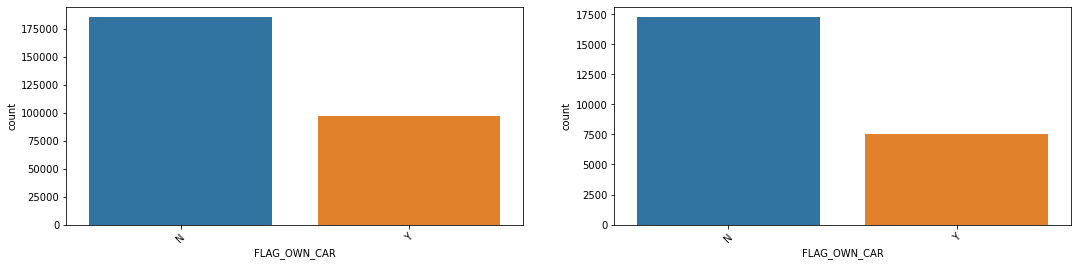

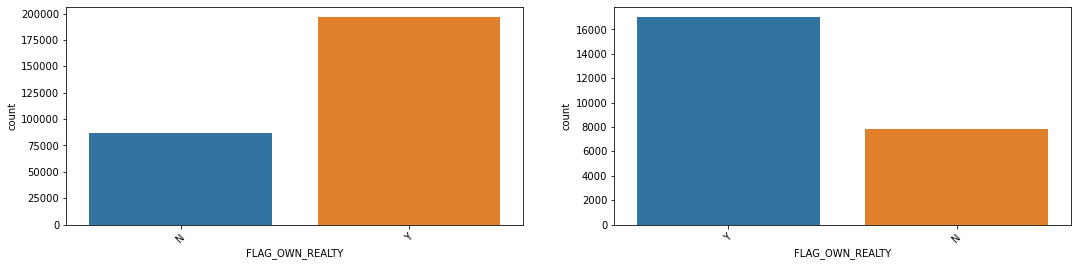

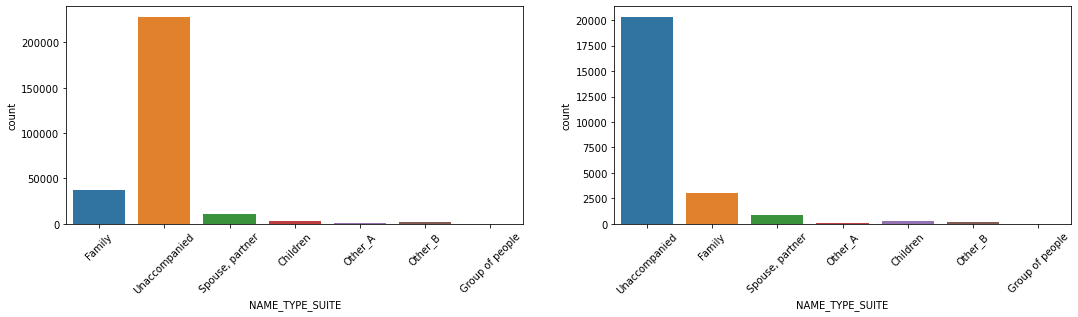

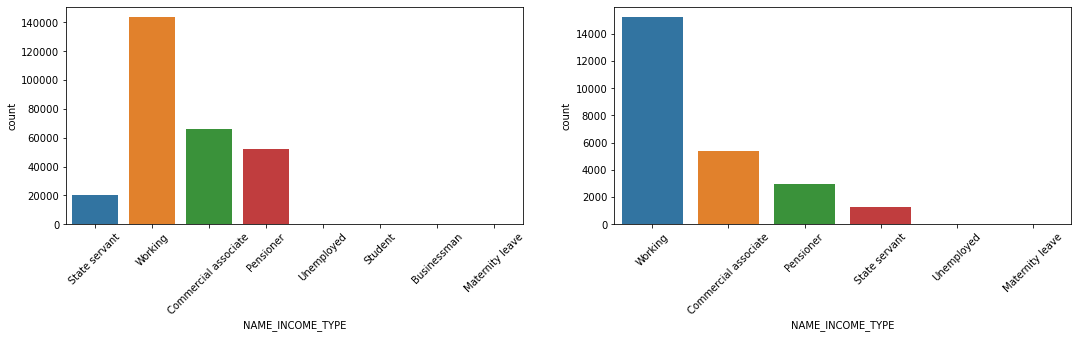

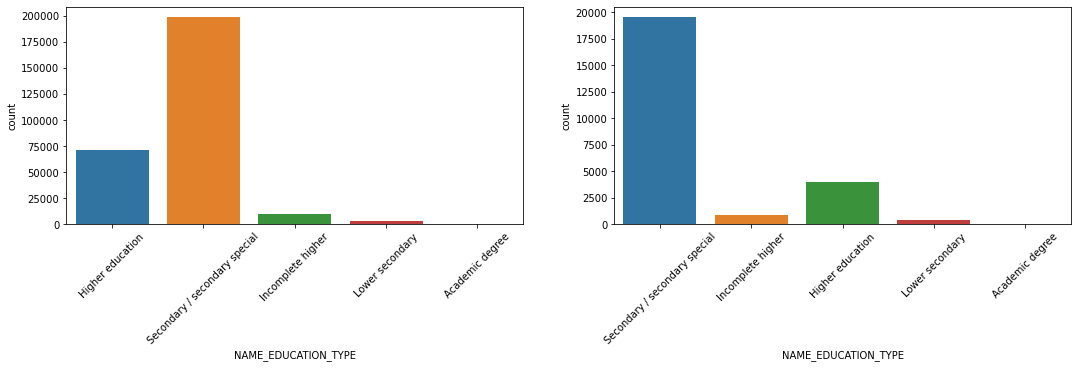

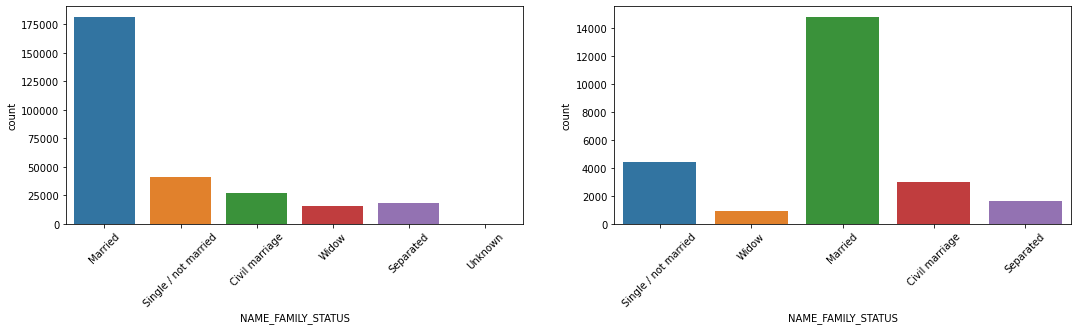

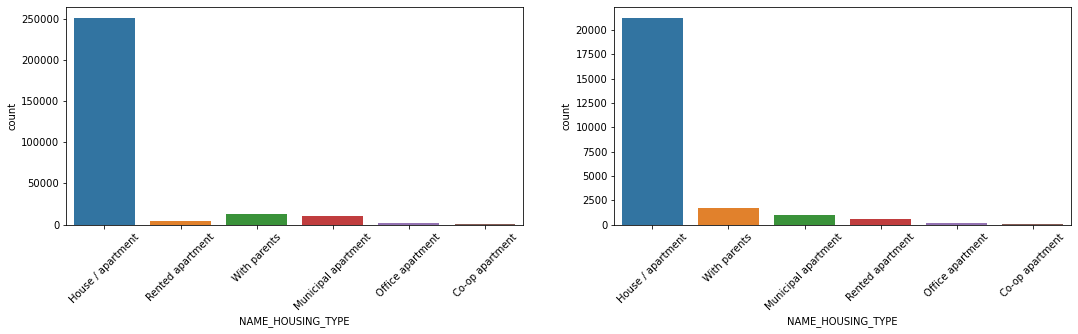

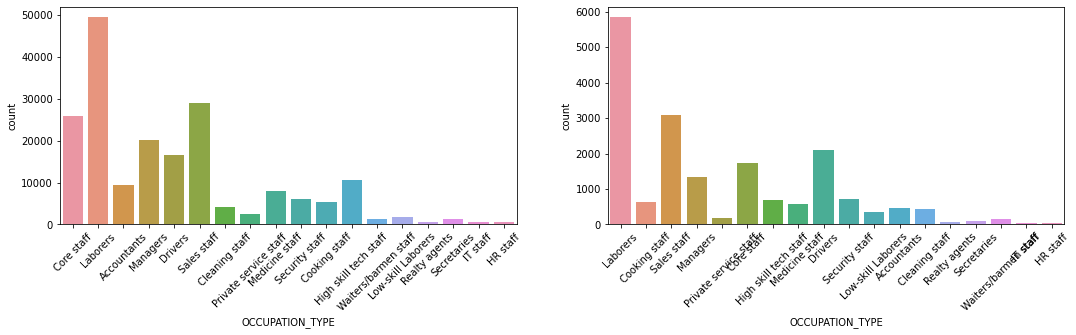

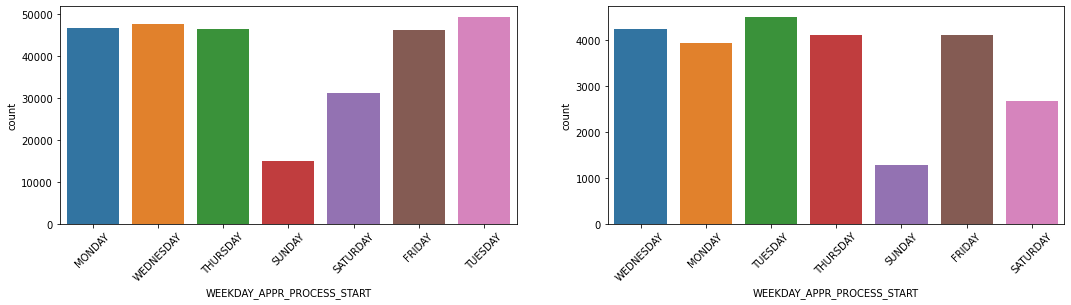

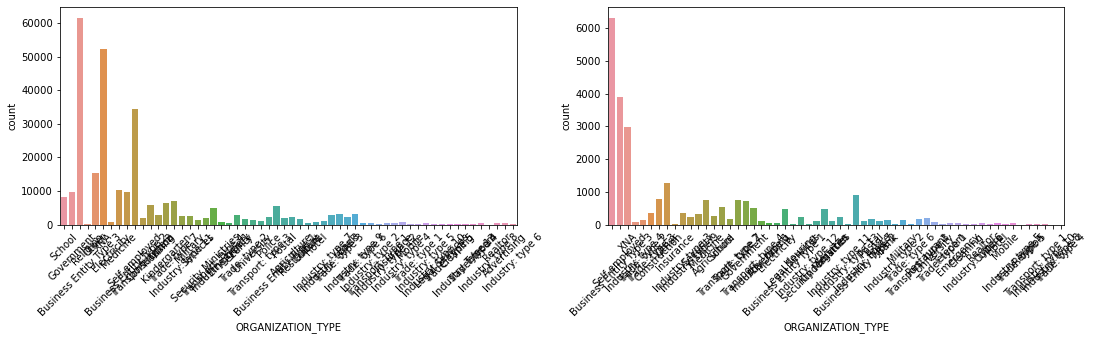

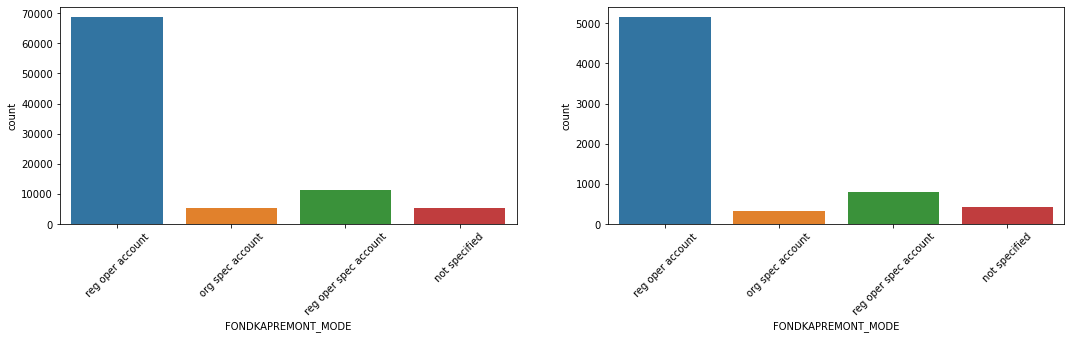

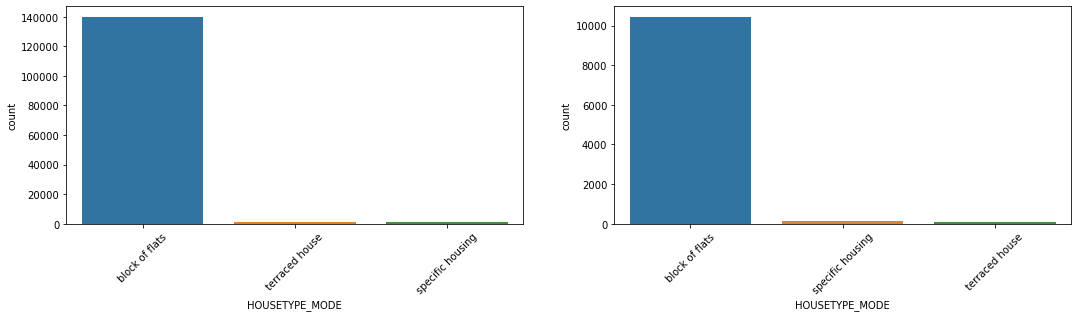

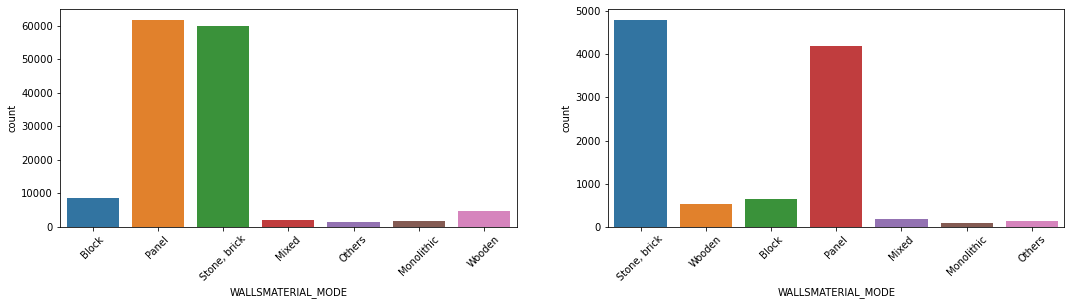

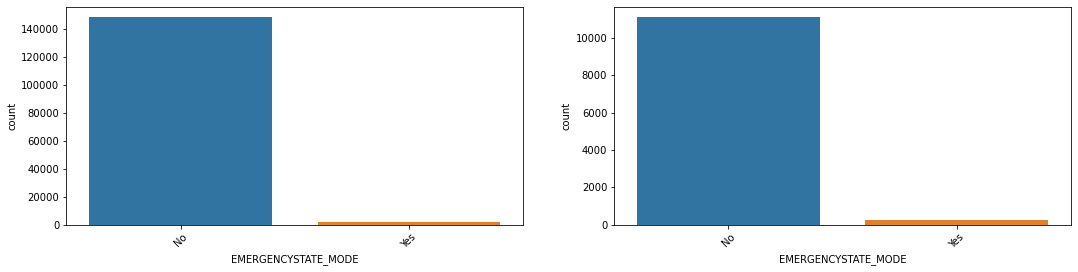

In [ ]:
def show_count_by_target(df, columns):
    cond_1 = (df['TARGET'] == 1)
    cond_0 = (df['TARGET'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 4), squeeze=False)
        # countplot을 이용하여 category값의 histogram 표현
        chart0 = sns.countplot(df[cond_0][column], ax=axs[0][0])
        # x축의 tick label들이 값 유형이 많으므로 45도로 회전하여 표현
        chart0.set_xticklabels(chart0.get_xticklabels(), rotation=45)
        chart1 = sns.countplot(df[cond_1][column], ax=axs[0][1])
        chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

        
show_count_by_target(app_train, object_columns)

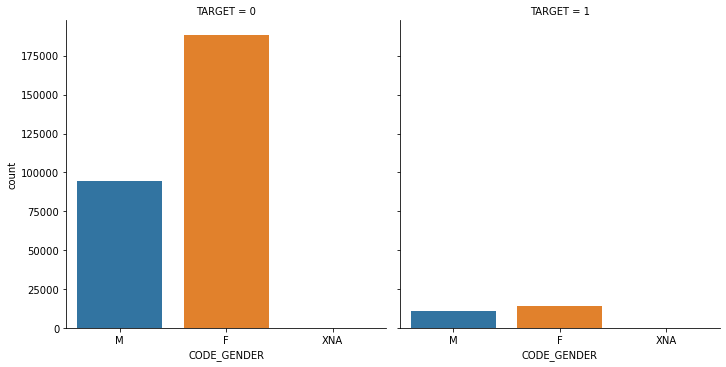

In [ ]:
# countplot은 각 plot마다 같은 feature value임에도 색이 다르다
# catplot을 이용하여 문제를 해결하자
# catplot을 이용하여 countplot을 특정 컬럼 값 조건에 따라 여러개의 subplot을 분리하여 보여줌.  
sns.catplot(x="CODE_GENDER",col="TARGET", data=app_train, kind="count")

column names : NAME_CONTRACT_TYPE
column names : CODE_GENDER
column names : FLAG_OWN_CAR
column names : FLAG_OWN_REALTY
column names : NAME_TYPE_SUITE
column names : NAME_INCOME_TYPE
column names : NAME_EDUCATION_TYPE
column names : NAME_FAMILY_STATUS
column names : NAME_HOUSING_TYPE
column names : OCCUPATION_TYPE
column names : WEEKDAY_APPR_PROCESS_START
column names : ORGANIZATION_TYPE
column names : FONDKAPREMONT_MODE
column names : HOUSETYPE_MODE
column names : WALLSMATERIAL_MODE
column names : EMERGENCYSTATE_MODE


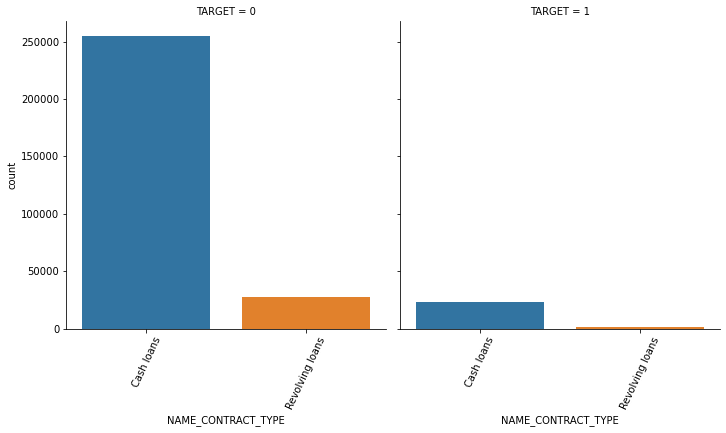

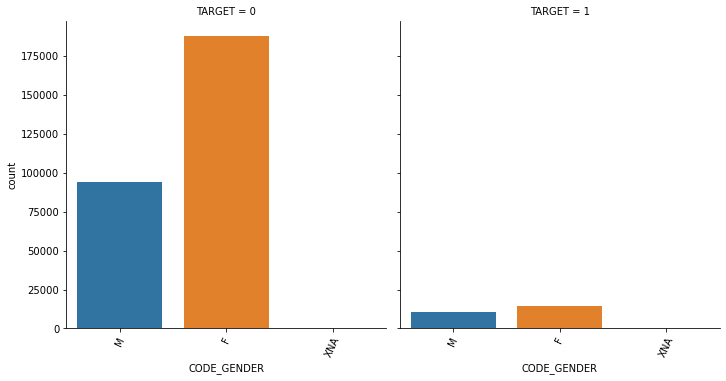

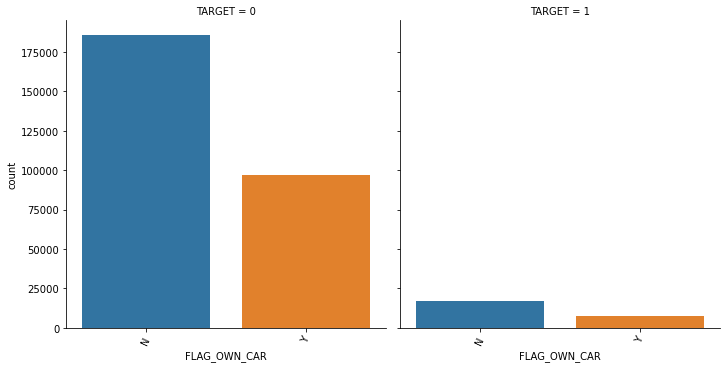

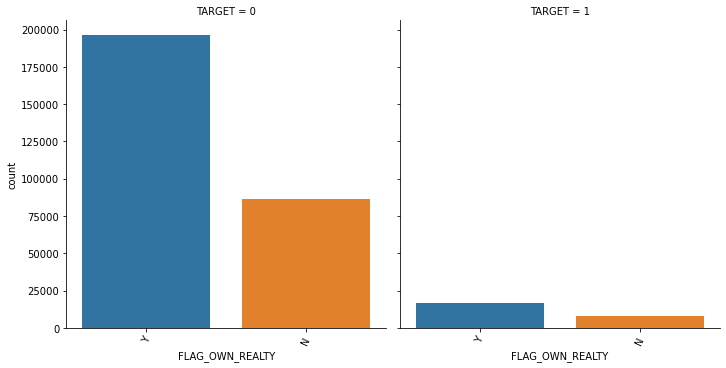

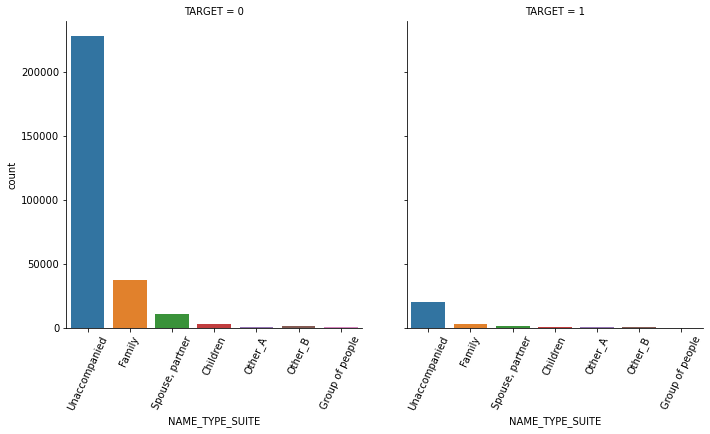

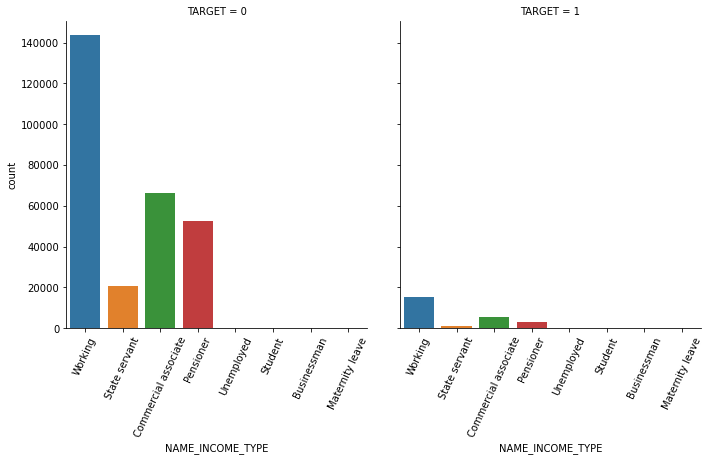

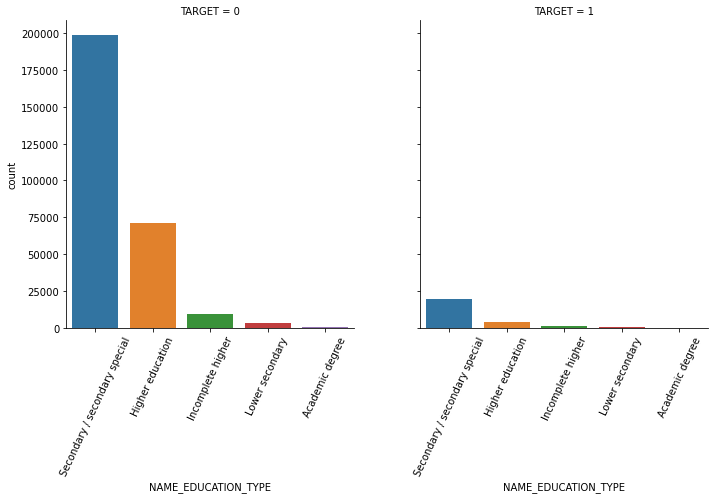

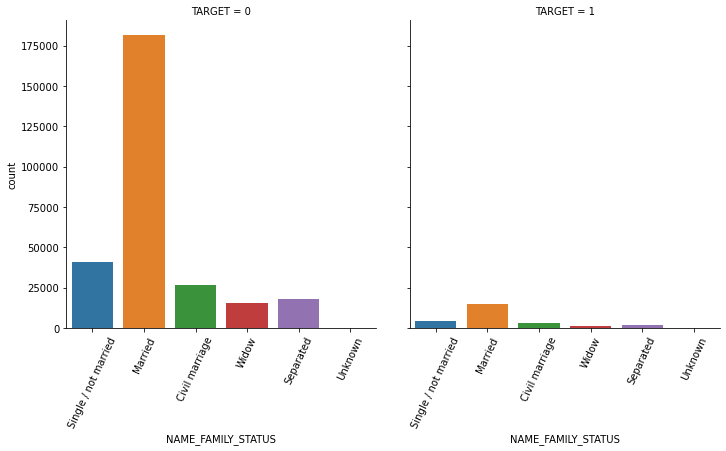

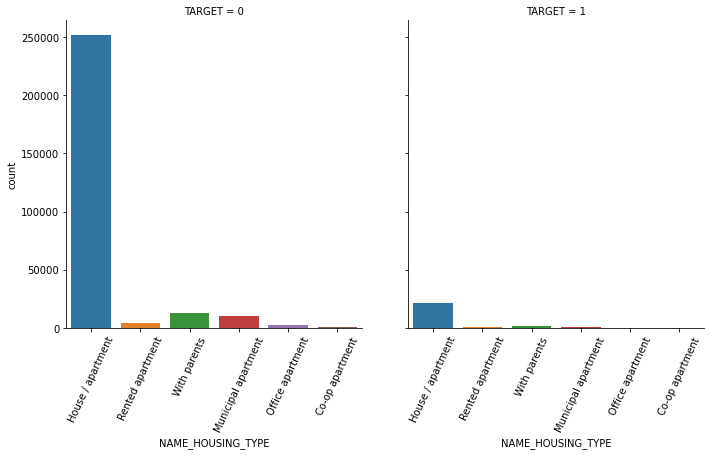

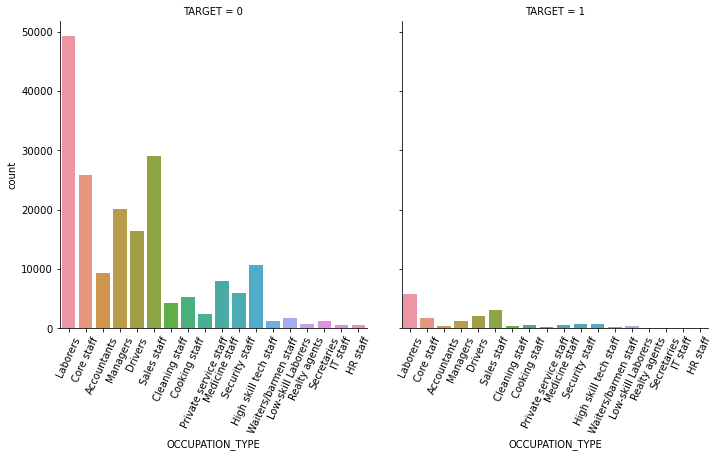

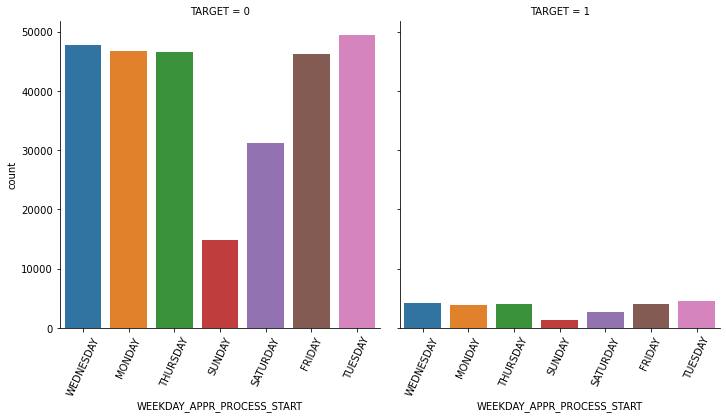

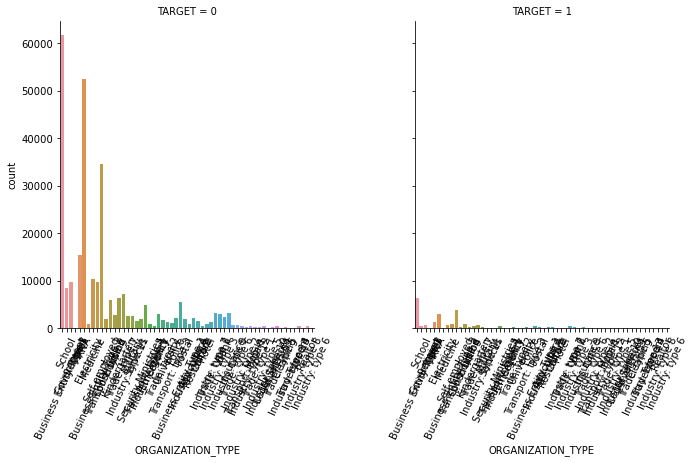

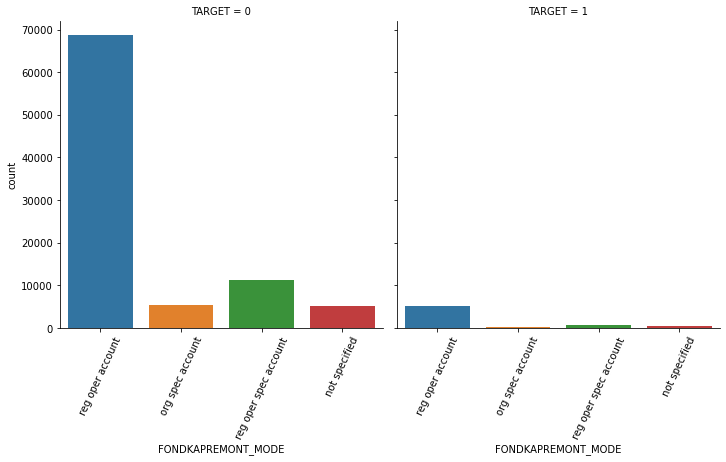

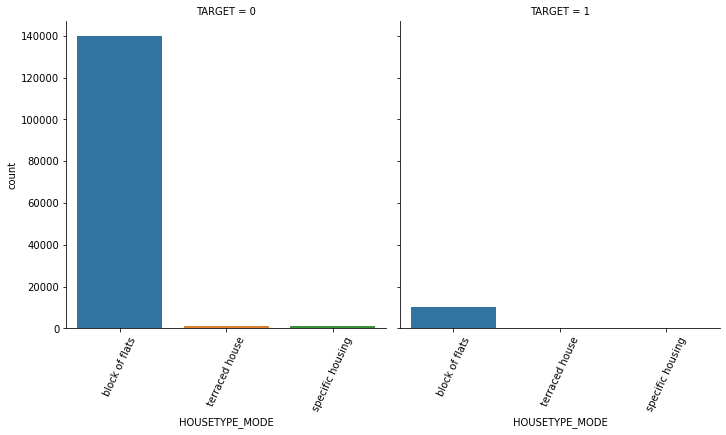

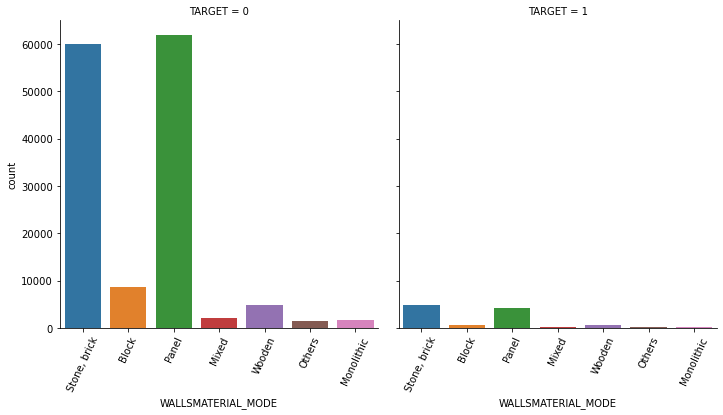

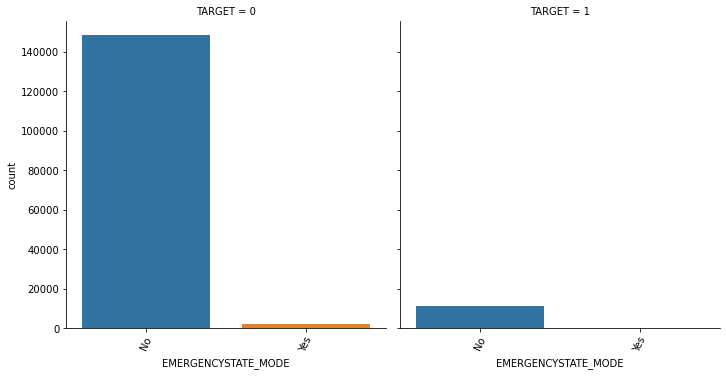

In [ ]:
# catplot을 이용하여 TARGET별로 여러컬럼의 category 값 Histogram을 표현.
def show_category_by_target(df, columns):
    for column in columns:
        print('column names :', column)
        chart = sns.catplot(x=column, col="TARGET", data=df, kind="count")
        # X축의 feature name들이 겹쳐지지 않게 65도 정도 회전
        chart.set_xticklabels(rotation=65)
        
show_category_by_target(app_train, object_columns)

In [ ]:
# 대출 횟수 대비 연체 비율이 남성이 여성보다 높음. 이를 value_counts()로 확인.
cond_1 = (app_train['TARGET'] == 1)
cond_0 = (app_train['TARGET'] == 0)
cond_f = (app_train['CODE_GENDER'] == 'F')
cond_m = (app_train['CODE_GENDER'] == 'M')

# 전체 건수 대비 남성과 여성의 비율 확인
print(app_train['CODE_GENDER'].value_counts()/app_train.shape[0])
# TARGET=1 일 경우 남성과 여성의 비율 확인
print(app_train[cond_1]['CODE_GENDER'].value_counts()/app_train[cond_1].shape[0])
# TARGET=0 일 경우 남성과 여성의 비율 확인
print(app_train[cond_0]['CODE_GENDER'].value_counts()/app_train[cond_0].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64
F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


#### 주요 컬럼들의 target과의 상관도 분석(heatmap)

<AxesSubplot:>

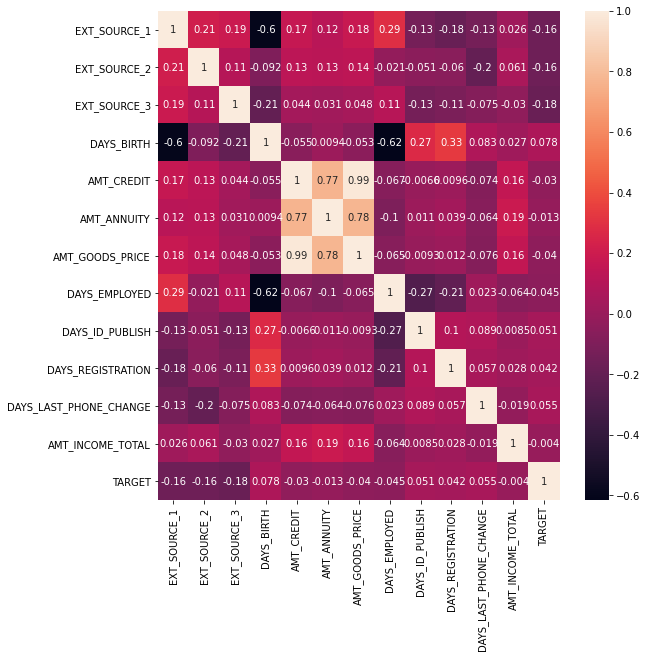

In [ ]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']

corr = app_train[corr_columns].corr()

plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True)

#### 이상치 데이터 확인 및 DAYS_EMPLOYED 이상치 값 변경 

In [ ]:
### 365243이 매우 많음. 약 1000년치에 해당하는 날짜(이상치)
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [ ]:
# CODE_GENDER의 경우 XNA가 4건 정도. 많지 않으므로 그대로 유지 
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
# LightGBM은 NULL값을 트리 모델 생성하는데 사용할 수 있으므로 일괄적으로 Null로 변환 
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

 NaN        55374
-200.0        156
-224.0        152
-230.0        151
-199.0        151
            ...  
-9681.0         1
-13421.0        1
-9703.0         1
-11283.0        1
-13497.0        1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### 주요 Feature들에 대한 feature engineering 수행
#### EXT_SOURCE 계열값 확인, EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 

In [ ]:
# 결측치 확인
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [ ]:
app_train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.546426         5
0.598469         5
0.622707         5
0.605152         5
             ...  
0.288500         1
0.807598         1
0.237983         1
0.412337         1
0.615170         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [ ]:
app_train['EXT_SOURCE_2'].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.009063      1
0.457284      1
0.017615      1
0.371661      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [ ]:
app_train['EXT_SOURCE_3'].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.028674        1
0.896010        1
0.858178        1
0.017506        1
0.028275        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [ ]:
# EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 
print('### mean ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print('### max ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print('### min ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print('### std ###\n',app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

### mean ###
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
### max ###
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
### min ###
 EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64
### std ###
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


#### 데이터 가공 전 학습과 테스트용 데이터 세트 결합

In [ ]:
apps = pd.concat([app_train, app_test])
print(apps.shape)

(356255, 122)


#### EXT_SOURCE_X FEATURE 가공
* EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성. 

In [ ]:
# EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성. 
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
#apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APPS_EXT_SOURCE_MEAN', 'APPS_EXT_SOURCE_STD']].head(10)

In [ ]:
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

40950

In [ ]:
# 새로 생성한 APPS_EXT_SOURCE_STD이 NULL일 경우 APPS_EXT_SOURCE_STD의 평균으로 일괄 변경. 
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

0

#### AMT_CREDIT 비율로 Feature 가공

In [ ]:
# AMT_CREDIT(대출 금액)으로 대출과 관련된 금액 추가 가공. 
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']

#### AMT_INCOME_TOTAL 비율로 Feature 가공

In [ ]:
# AMT_INCOME_TOTAL 비율로 대출 금액 관련 피처 가공
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
# 가족수를 고려한 가처분 소득 피처 가공. 
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']

#### DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공.

In [ ]:
# DAYS_BIRTH, DAYS_EMPLOYED 비율로 소득/자산 관련 Feature 가공. 
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']


#### 데이터 레이블 인코딩, NULL값은 LightGBM 내부에서 처리하도록 특별한 변경하지 않음. 

In [ ]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 136 entries, SK_ID_CURR to APPS_CAR_EMPLOYED_RATIO
dtypes: float64(81), int64(55)
memory usage: 372.4 MB


#### 학습 데이터와 테스트 데이터 다시 분리

In [ ]:
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]

apps_test = apps_test.drop('TARGET', axis=1)

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 

In [ ]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2021)
train_x.shape, valid_x.shape

((215257, 134), (92254, 134))

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
        early_stopping_rounds= 100)


Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.759928	training's binary_logloss: 0.247073	valid_1's auc: 0.748989	valid_1's binary_logloss: 0.250541
[200]	training's auc: 0.780716	training's binary_logloss: 0.240017	valid_1's auc: 0.759834	valid_1's binary_logloss: 0.246548
[300]	training's auc: 0.79523	training's binary_logloss: 0.235347	valid_1's auc: 0.76416	valid_1's binary_logloss: 0.245088
[400]	training's auc: 0.80741	training's binary_logloss: 0.231545	valid_1's auc: 0.766056	valid_1's binary_logloss: 0.244437
[500]	training's auc: 0.817543	training's binary_logloss: 0.228327	valid_1's auc: 0.766691	valid_1's binary_logloss: 0.244215
[600]	training's auc: 0.826604	training's binary_logloss: 0.225323	valid_1's auc: 0.766923	valid_1's binary_logloss: 0.244104
[700]	training's auc: 0.83524	training's binary_logloss: 0.222432	valid_1's auc: 0.767104	valid_1's binary_logloss: 0.244014
[800]	training's auc: 0.842682	training's binary_logloss: 0.

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

#### 결과분석
* feature engineering이전의 AUC 값(0.757631)
* feature engineering이후의 AUC 값(0.767598)
* 결과가 좋아졌다는 사실을 알 수 있다.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

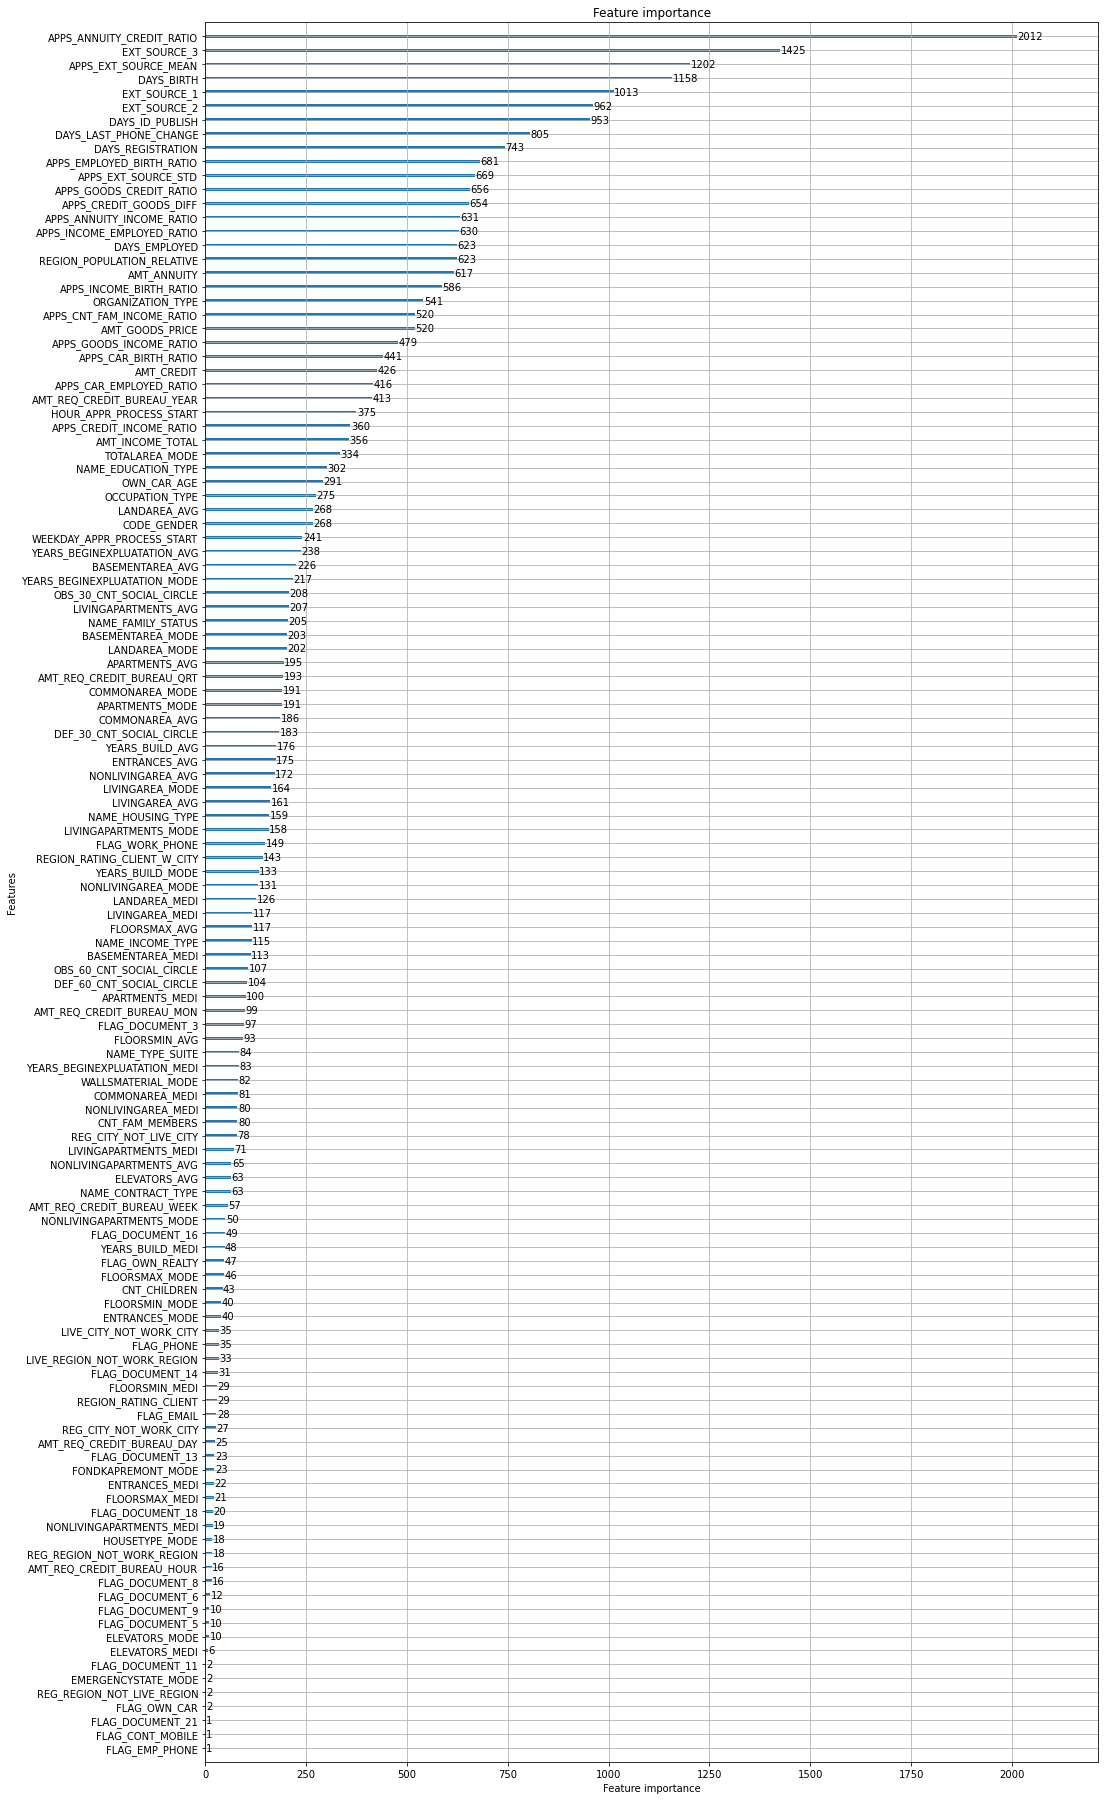

In [ ]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [ ]:
#### application 데이터 세트 feature engineering을 함수화

def get_apps_processed(apps):
    
    # EXT_SOURCE_X FEATURE 가공
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
      
    # AMT_CREDIT 비율로 Feature 가공
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
    
    # AMT_INCOME_TOTAL 비율로 Feature 가공
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']
    
    # DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
       
    return apps

    